In [1]:
# Importing numpy for numerical operations
import numpy as np
# For plotting if needed later
import matplotlib.pyplot as plt

In [2]:
# This represents the letter Converting 2D binary image of letter to 1D array
A = np.array([
    [0,1,1,1,0,0],
    [1,0,0,0,1,0],
    [1,1,1,1,1,0],
    [1,0,0,0,1,0],
    [1,0,0,0,1,0]
]).flatten()

B = np.array([
    [1,1,1,1,0,0],
    [1,0,0,0,1,0],
    [1,1,1,1,0,0],
    [1,0,0,0,1,0],
    [1,1,1,1,0,0]
]).flatten()

C = np.array([
    [0,1,1,1,1,0],
    [1,0,0,0,0,0],
    [1,0,0,0,0,0],
    [1,0,0,0,0,0],
    [0,1,1,1,1,0]
]).flatten()

In [3]:
X = np.array([A, B, C]) / 1.0  # dividing by 1.0 doesn't change values here
y = np.array([
    [1, 0, 0],  # This represents the letter A
    [0, 1, 0],  # This represents the letter B
    [0, 0, 1]   # This represents the letter C
])

In [4]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

In [5]:
np.random.seed(42)
input_size = 30
hidden_size = 10
output_size = 3

# Random weight initialization
W1 = np.random.uniform(-1, 1, (input_size, hidden_size))
b1 = np.zeros((1, hidden_size))

W2 = np.random.uniform(-1, 1, (hidden_size, output_size))
b2 = np.zeros((1, output_size))

In [6]:
epochs = 10000
lr = 0.1
losses = []

for epoch in range(epochs):
    # Feedforward
    z1 = np.dot(X, W1) + b1
    a1 = sigmoid(z1)

    z2 = np.dot(a1, W2) + b2
    a2 = sigmoid(z2)

    # Loss (MSE)
    loss = np.mean((y - a2) ** 2)
    losses.append(loss)

    # This represents the letter Backpropagation
    d_a2 = (a2 - y) * sigmoid_derivative(a2)
    d_W2 = np.dot(a1.T, d_a2)
    d_b2 = np.sum(d_a2, axis=0, keepdims=True)

    d_a1 = np.dot(d_a2, W2.T) * sigmoid_derivative(a1)
    d_W1 = np.dot(X.T, d_a1)
    d_b1 = np.sum(d_a1, axis=0, keepdims=True)

    # Update weights and biases
    W2 -= lr * d_W2
    b2 -= lr * d_b2
    W1 -= lr * d_W1
    b1 -= lr * d_b1

    # Print loss occasionally
    if epoch % 1000 == 0:
        print(f"Epoch {epoch} | Loss: {loss:.4f}")

print("Training complete.")

Epoch 0 | Loss: 0.2588
Epoch 1000 | Loss: 0.0035
Epoch 2000 | Loss: 0.0014
Epoch 3000 | Loss: 0.0009
Epoch 4000 | Loss: 0.0006
Epoch 5000 | Loss: 0.0005
Epoch 6000 | Loss: 0.0004
Epoch 7000 | Loss: 0.0003
Epoch 8000 | Loss: 0.0003
Epoch 9000 | Loss: 0.0003
Training complete.


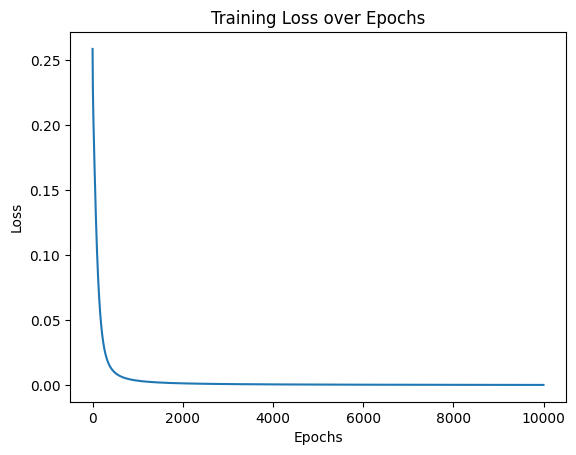

In [7]:
plt.plot(losses)
plt.title("Training Loss over Epochs")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

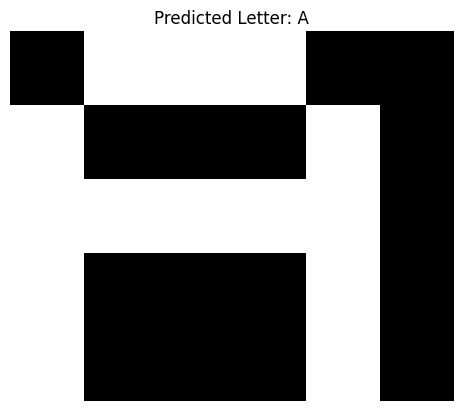

Expected: A, Predicted: A, Probabilities: [[0.98134818 0.01732905 0.00962831]]


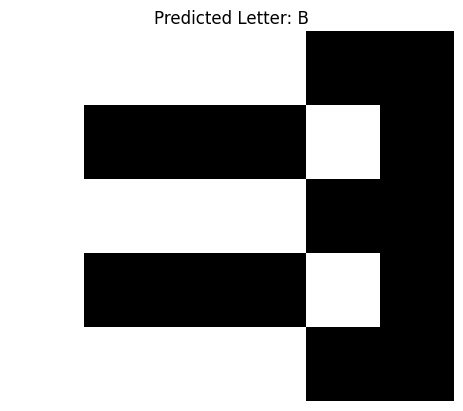

Expected: B, Predicted: B, Probabilities: [[0.01361396 0.98154085 0.01345331]]


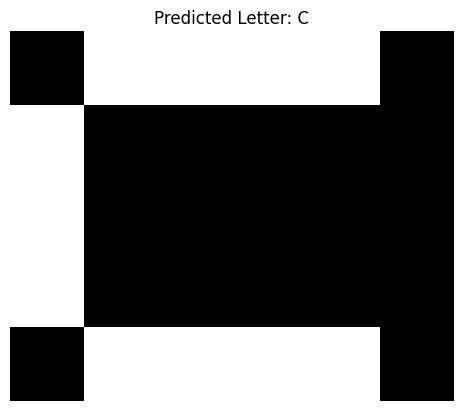

Expected: C, Predicted: C, Probabilities: [[0.01213649 0.01382392 0.98369652]]


In [8]:
def predict(image):
    hidden = sigmoid(np.dot(image, W1) + b1)
    output = sigmoid(np.dot(hidden, W2) + b2)
    return output

def display(image, label="Unknown"):
    plt.imshow(image.reshape(5, 6), cmap='gray')
    plt.title(f"Predicted Letter: {label}")
    plt.axis('off')
    plt.show()

# Predict A, B, C
for i, letter in enumerate(["A", "B", "C"]):
    output = predict(X[i])
    pred = np.argmax(output)
    classes = ["A", "B", "C"]
    display(X[i], classes[pred])
    print(f"Expected: {letter}, Predicted: {classes[pred]}, Probabilities: {output}")
